In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
# anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
data = pd.read_csv('../out/study2.csv')
data['FS'] = data['method'].apply(lambda x: x.split('_')[0][2])
data['HT'] = data['method'].apply(lambda x: x.split('_')[1][2])
data

,metric,mean,method,i,dataset,FS,HT
0,CCC,0.182727,FS0_HT0,0,sim_null,0,0
1,MAE,0.755556,FS0_HT0,0,sim_null,0,0
2,R2,0.095328,FS0_HT0,0,sim_null,0,0
3,RMSE,0.951615,FS0_HT0,0,sim_null,0,0
4,RMSPE,5.735780,FS0_HT0,0,sim_null,0,0
...,...,...,...,...,...,...,...
47995,RMSE,6.230561,FS1_HT1,499,spectral,1,1
47996,RMSPE,0.128493,FS1_HT1,499,spectral,1,1
47997,RSR,0.997499,FS1_HT1,499,spectral,1,1
47998,r,0.149350,FS1_HT1,499,spectral,1,1


In [8]:
data.query("metric == 'r'").loc[:, ["metric", "mean", "method", "dataset"]]\
    .groupby(["metric", "dataset", "method"]).agg(["mean", "std"])

mean          
                             mean       std
metric dataset  method                     
r      sim_null FS0_HT0  0.333964  0.027007
                FS0_HT1  0.320376  0.032612
                FS1_HT0  0.027036  0.061018
                FS1_HT1 -0.003407  0.066275
       sim_spec FS0_HT0  0.391880  0.039644
                FS0_HT1  0.373725  0.043782
                FS1_HT0  0.389939  0.040762
                FS1_HT1  0.371798  0.045613
       spectral FS0_HT0  0.268398  0.025234
                FS0_HT1  0.230865  0.039530
                FS1_HT0  0.201281  0.048824
                FS1_HT1  0.161952  0.055984

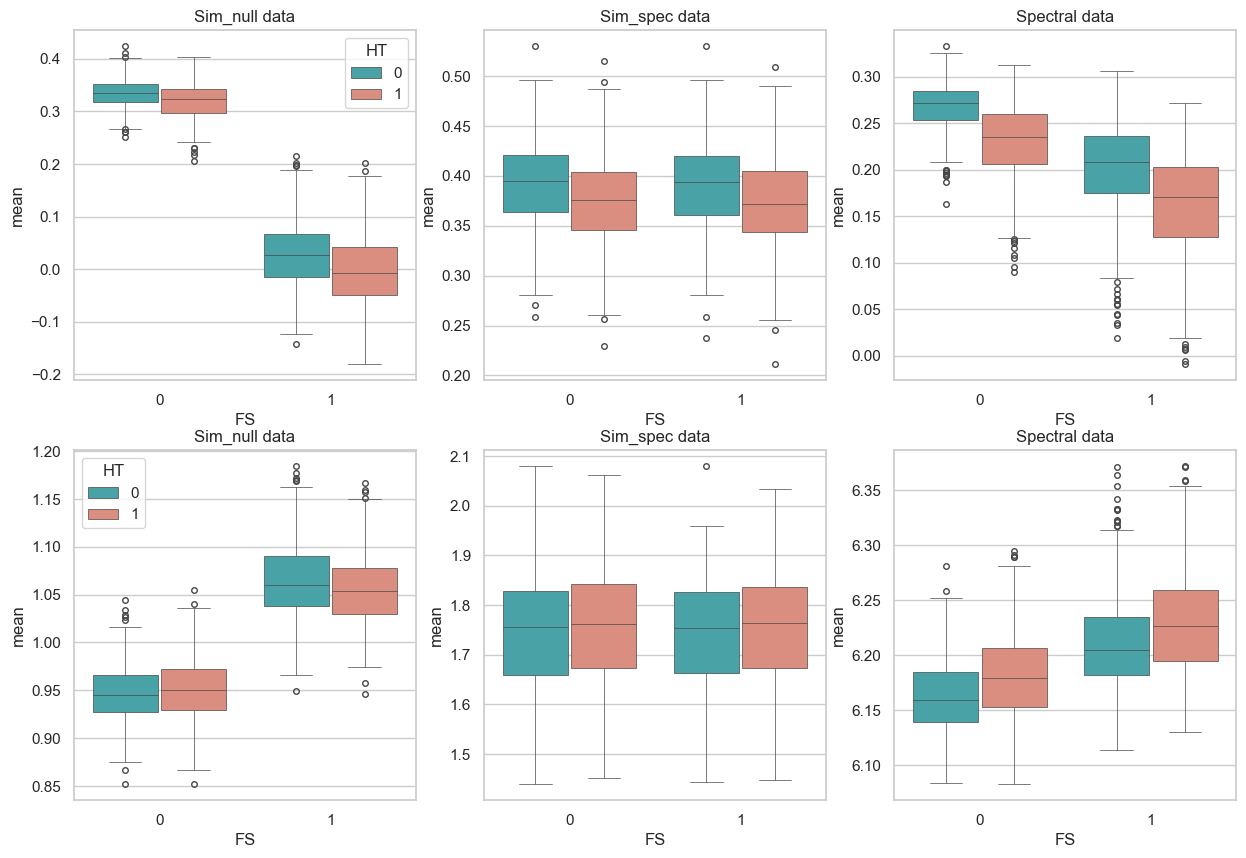

In [18]:
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#E88471"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, m in enumerate(["sim_null", "sim_spec", "spectral"]):
    sns.boxplot(
        data=data.query(f"dataset == '{m}' and metric == 'r'"),
        x="FS", y="mean",
        hue="HT",
        gap=0.05,
        linewidth=0.5,
        fliersize=4,
        palette=palette,
        ax=axes[0][i],
    )
    if i != 0:
        axes[0][i].get_legend().remove()
    axes[0][i].set_title(f"{m.capitalize()} data")
    sns.boxplot(
        data=data.query(f"dataset == '{m}' and metric == 'RMSE'"),
        x="FS", y="mean",
        hue="HT",
        gap=0.05,
        linewidth=0.5,
        fliersize=4,
        palette=palette,
        ax=axes[1][i],
    )
    if i != 0:
        axes[1][i].get_legend().remove()
    axes[1][i].set_title(f"{m.capitalize()} data")
plt.savefig("../out/study2.png", dpi=300)

In [14]:
data.head()


array(['sim_null', 'sim_spec', 'spectral'], dtype=object)

In [17]:
formula = 'mean ~ FS + HT + FS:HT'
dataset = ["sim_null", "sim_spec", "spectral"]
metrics = ["r", "RMSE"]
for d in dataset:
    for m in metrics:
        # ANOVA
        model = ols(formula, data.query(f"dataset == '{d}' and metric == '{m}'")).fit()
        aov_table = anova_lm(model)
        print()
        print(f"Dataset: {d}, Metric: {m}")
        print(aov_table)



Dataset: sim_null, Metric: r
              df     sum_sq    mean_sq             F        PR(>F)
FS           1.0  49.724554  49.724554  20073.413962  0.000000e+00
HT           1.0   0.242355   0.242355     97.836772  1.485860e-22
FS:HT        1.0   0.035511   0.035511     14.335617  1.574623e-04
Residual  1996.0   4.944361   0.002477           NaN           NaN

Dataset: sim_null, Metric: RMSE
              df    sum_sq   mean_sq            F    PR(>F)
FS           1.0  6.146971  6.146971  5019.355206  0.000000
HT           1.0  0.001348  0.001348     1.100989  0.294176
FS:HT        1.0  0.020312  0.020312    16.585517  0.000048
Residual  1996.0  2.444409  0.001225          NaN       NaN

Dataset: sim_spec, Metric: r
              df        sum_sq       mean_sq          F        PR(>F)
FS           1.0  1.870485e-03  1.870485e-03   1.034764  3.091656e-01
HT           1.0  1.646791e-01  1.646791e-01  91.101563  3.827325e-21
FS:HT        1.0  2.855096e-08  2.855096e-08   0.000016  9.968